In [2]:
import os

import matplotlib.pyplot as plt
import xarray as xr

import basd

In [2]:
data_path = '/Users/prim232/OneDrive - PNNL/Desktop'

In [3]:
unadjusted_filename = 'rsds_day_MIROC6_ssp370_r2i1p1f1_gn_20150101-20241231.nc'
corrected_filename = 'rsds_day_MIROC6_ssp370_r2i1p1f1_gn_20150101-20241231_biascorrected_ewembi_.nc'

In [18]:
rsds_unadjusted = xr.open_dataset(os.path.join(data_path, unadjusted_filename),
                                  decode_times=False)
rsds_corrected = xr.open_dataset(os.path.join(data_path, corrected_filename),
                                 decode_times=False)

In [11]:
rsds_corrected

<xarray.Dataset>
Dimensions:      (time: 3653, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-01T12:00:00 ... 2024-12-31T12:...
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] ...
    lat_bnds     (lat, bnds) float64 ...
    lon_bnds     (lon, bnds) float64 ...
    rsds         (time, lat, lon) float32 ...
    spatial_ref  int64 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP AerChemMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-09-03T08:18:31Z
    ...                     ...
    title:                  MIROC6 output prepared for CMIP6
    variable_id:            rsds
    variant_label:          r2i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/8c07195a-7ba8-49ea-b743-bd549540cf5c

In [6]:
rsds_unadjusted

<xarray.Dataset>
Dimensions:    (time: 3653, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2024-12-31T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    rsds       (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP AerChemMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-09-03T08:18:31Z
    ...                     ...
    title:                  MIROC6 output prepared for CMIP6
    variable_id:            rsds
    variant_label:          r2i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/8c07195a-7ba8-49ea-b743-bd549540cf5c

In [19]:
diff_grid = rsds_corrected-rsds_unadjusted

In [ ]:
diff_grid['rsds'].attrs = rsds_corrected['rsds'].attrs

In [ ]:
diff_grid.to_netcdf(path=os.path.join(data_path,'rsds_difference.nc'))

In [34]:
pct_diff_grid = diff_grid / rsds_unadjusted

In [35]:
pct_diff_grid['rsds'].attrs = rsds_corrected['rsds'].attrs

In [36]:
pct_diff_grid.to_netcdf(path=os.path.join(data_path,'rsds_pct_difference.nc'))

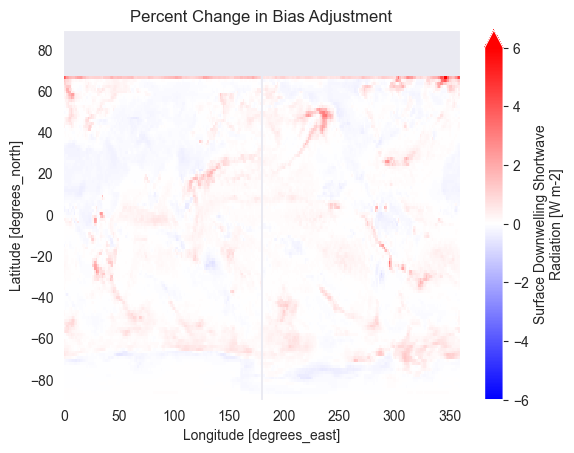

In [77]:
slice1 = pct_diff_grid['rsds'].isel(time=1)
slice1.plot.pcolormesh(cmap='bwr', center=0, vmin=-6, vmax=6)
plt.title('Percent Change in Bias Adjustment')
plt.show()

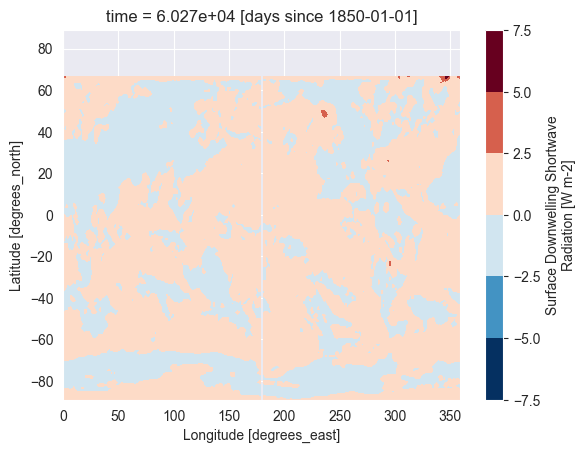

In [73]:
slice1.plot.contourf()

In [10]:
data_specification = {
        'pr-CESM2-WACCM-EWEMBI-ssp370': {
            'target_model': 'CESM2-WACCM',
            'target_variable': 'pr',
            'target_scenario': 'ssp370',
            'start_historic_date': '20100101',
            'end_historic_date': '20150101',
            'start_future_date': '20950101',
            'end_future_date': '21010101',
            'model_setup': 'r1i1p1f1',
            'remap_grid': True
        },

        'rsds-MIROC6-EWEMBI-ssp370': {
            'target_model': 'MIROC6',
            'target_variable': 'rsds',
            'target_scenario': 'ssp370',
            'start_historic_date': '20100101',
            'end_historic_date': '20141231',
            'start_future_date': '20150101',
            'end_future_date': '20241231',
            'model_setup': 'r2i1p1f1',
            'remap_grid': True
        }
    }

In [15]:
data_specification[list(data_specification)[0]]['target_variable']

'pr'